In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

load from file

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/' #2018_2021_global_m5/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
iv2 = pd.read_pickle(root+'iv2_dataframe.pkl')
with open(root+'list_iv2', "rb") as fp:   #Pickling
    list_iv2 = pickle.load(fp)
with open(root+'list_mag', "rb") as fp:   #Pickling
    list_mag = pickle.load(fp)
with open(root+'list_dist', "rb") as fp:   #Pickling
    list_dist = pickle.load(fp) 

In [30]:
dist_corr_mult = (np.array(list_dist)**2)*np.array(list_iv2)

In [31]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    #importance = np.array(n)
    y_real= np.log10(dist_corr_mult)
    x = np.array(list_mag)
    y_guess = (a*x+b)
    return sum(abs(y_guess-y_real))

Text(0.5, 1.0, 'log10(iv2) referenced to 1km by multiplying by distance^2')

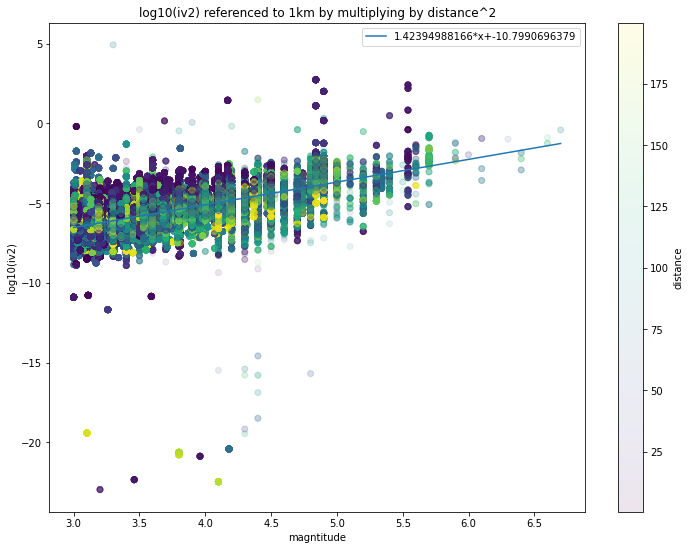

In [42]:
plt.figure(figsize=(12,9))
plt.scatter(list_mag, np.log10(dist_corr_mult),  c = list_dist, cmap = 'viridis', alpha = 0.1)
plt.ylabel('log10(iv2)')
plt.xlabel('magntitude')
plt.colorbar(label = 'distance')
initial_guess = (1.4,0)
res = optimize.minimize(obj, initial_guess, method = 'Nelder-mead')
x = np.linspace(min(list_mag), max(list_mag), 20)
y = res.x[0] * x + res.x[1]
plt.plot(x,y, label = str(res.x[0]) + '*x+'+ str(res.x[1]))
#plt.vlines(res.x[0], 0 , 4, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
plt.legend()
plt.title('log10(iv2) referenced to 1km by multiplying by distance^2')
#plt.ylim([-10, 2])
#plt.xscale('log')

In [17]:
import pickle
import pandas as pd
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'
with open(root+'list_iv2', "rb") as fp:   #Pickling
    list_iv2 = pickle.load(fp)
with open(root+'list_mag', "rb") as fp:   #Pickling
    list_mag = pickle.load(fp)
with open(root+'list_dist', "rb") as fp:   #Pickling
    list_dist = pickle.load(fp) 
iv2_in_mag_bins =  [[] for _ in range(int((max(list_mag)-min(list_mag))*10))]
for i in range(0, len(list_mag)):
    iv2_in_mag_bins[int((list_mag[i]-min(list_mag))*10)].append(list_iv2[i])
with open(root+'iv2_in_mag_bins', "wb") as fp:   #Pickling
    pickle.dump(iv2_in_mag_bins, fp)

In [4]:
with open(root+'iv2_in_mag_bins', "rb") as fp:   #Pickling
    iv2_in_mag_bins = pickle.load(fp)

[]

In [150]:
list_mag[i]

3.7

In [153]:
for i in range(0, 100):
    print(list_mag[i], int((list_mag[i]-min(list_mag))*10))

4.2 12
4.2 12
4.2 12
4.2 12
4.2 12
4.2 12
4.2 12
4.2 12
4.2 12
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
3.0 0
4.2 12
3.7 7
3.7 7
3.7 7
3.7 7
3.7 7
3.7 7


In [146]:
len(iv2_in_mag_bins[10])

148221

In [21]:
for i in range(0, len(list_mag)):
    iv2_in_mag_bins[int(list_mag[i]-min(list_mag))*10].append(list_iv2[i])

KeyboardInterrupt: 

heatmap using hist2d

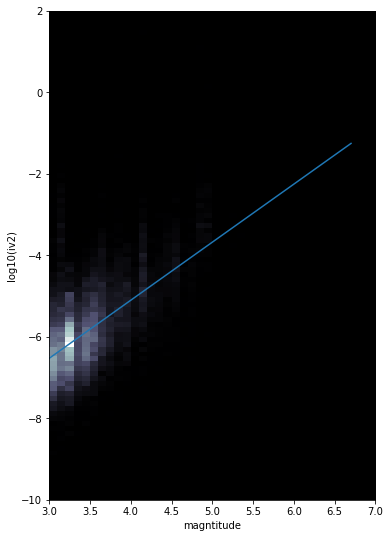

In [133]:
#fig = plt.figure()
#ax = fig.add_subplots( title='imshow: square bins')
plt.figure(figsize=(12,9))
y_limits = np.logspace(-10, 2, 100)
x_limits = np.linspace(3, 7, 41)
H, xedges, yedges = np.histogram2d(list_mag, dist_corr_mult,  bins=[x_limits, y_limits])
H = H.T
#plt.scatter(list_mag, np.log10(dist_corr_mult),  c = list_dist, cmap = 'viridis')
#ax = fig.add_subplot(111, title='imshow: square bins')
plt.imshow(H, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], np.log10(yedges[0]), np.log10(yedges[-1])], aspect = 0.5, cmap = 'bone')
#X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
#ax.pcolormesh(X, Y, H)
plt.ylabel('log10(iv2)')
plt.xlabel('magntitude')
plt.ylim([-10,2])

initial_guess = (1.4,0)
res = optimize.minimize(obj, initial_guess, method = 'Nelder-mead')
x = np.linspace(min(list_mag), max(list_mag), 20)
y = res.x[0] * x + res.x[1]
plt.plot(x,y, label = str(res.x[0]) + '*x+'+ str(res.x[1]))
#plt.vlines(res.x[0], 0 , 4, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
#plt.legend()
#plt.title('log10(iv2) referenced to 1km by multiplying by distance^2')
#plt.ylim([-10, 2])
#plt.xscale('log')

In [118]:
fig.set_figwidth(4)
fig.set_figheight(1)

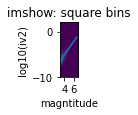

In [119]:
fig

TypeError: Dimensions of C (40, 9) are incompatible with X (41) and/or Y (10); see help(pcolormesh)

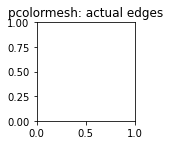

In [84]:
fig = plt.figure()
ax = fig.add_subplot(132, title='pcolormesh: actual edges',aspect='equal')
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)
plt.show()

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(12.8,9))#iv2.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in iv2.columns[:-1]:
        for ind_ad in iv2[column][row]:
            axs.scatter(float(column), ind_ad, color='blue')
        #axs[row_count][col_count].set_xscale('log')
        #axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('iv2')
plt.xlabel('magnitude')
plt.yscale('log')
plt.ylim([0.000001, 0.00000000000001])
plt.show()

onto row/column plot


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f79b0274ca0> (for post_execute):


KeyboardInterrupt: 

onto row/column plot


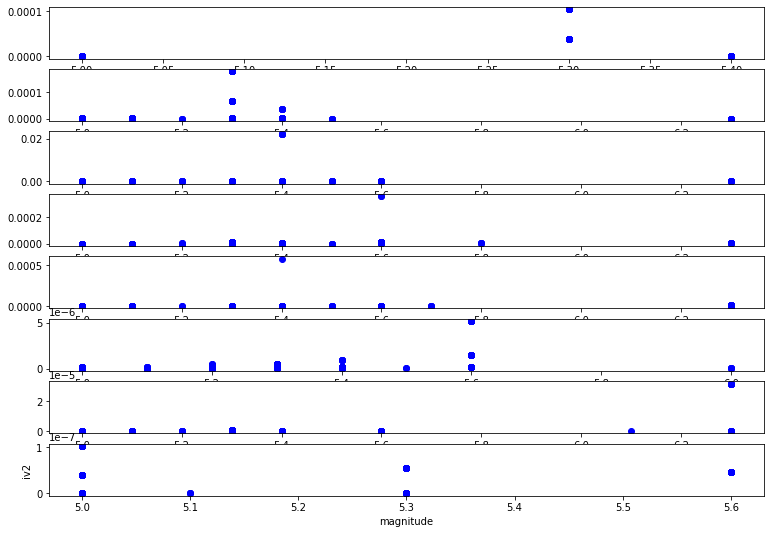

In [16]:
fig, axs = plt.subplots(8, 1, figsize=(12.8,9))#iv2.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in iv2.columns[:-1]:
        for ind_ad in iv2[column][row]:
            axs[row_count].scatter(float(column), ind_ad, color='blue')
        #axs[row_count][col_count].set_xscale('log')
        #axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('iv2')
plt.xlabel('magnitude')
plt.show()

In [89]:
m = [] 
for e in cat_with_data:
    m.append(e.magnitudes[0].mag)

In [88]:
e.magnitudes[0].mag

5.0

In [90]:
min(m)

5.0

In [91]:
max(m)

7.5

bootstrapping

In [14]:
from scipy import optimize

In [10]:
import random 
def bootstrapping_function():
    m_all = np.array(list_mag)
    t_all = np.array(list_iv2)
    t_BS = []
    m_BS = []
    for count in range(0,len(t_all)):
        #print(count)
        i = random.randrange(0,len(t_all))
        t_BS.append(t_all[i])
        m_BS.append(m_all[i])
    print(t_BS[0], m_BS[0])
    return m_BS, t_BS

In [11]:
def obj_BS_1(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    #importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    #print(m_real[0], t[0])
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_BS_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    #importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

In [15]:
gradt = []
intercepts = []
gradt_2 = []
intercepts_2 = []
gradt_polyfit = []
intercepts_polyfit = []
for bs in range(0, 10):
    print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    m_BS, t_BS = bootstrapping_function()
    res = optimize.minimize(obj_BS_1, initial_guess, method = 'TNC')
    gradt.append(res.x[0])
    intercepts.append(res.x[1])
    #print('bootstrapping run'+str(bs))
    #initial_guess = (0, 0)
    #res = optimize.minimize(obj_BS_2, initial_guess, method = 'TNC')
    #gradt_2.append(res.x[0])
    #intercepts_2.append(res.x[1])  
    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
    gradt_polyfit.append(a)
    intercepts_polyfit.append(b)    

bootstrapping run0
1.07178111759e-07 3.6
bootstrapping run1
2.52105885879e-08 3.2
bootstrapping run2
4.73584019976e-09 3.7
bootstrapping run3
1.40993308e-08 4.18
bootstrapping run4
5.31241296116e-08 4.37
bootstrapping run5
2.56202146676e-11 3.26
bootstrapping run6
8.06554761336e-10 3.9
bootstrapping run7
2.81096809001e-09 3.5
bootstrapping run8
4.58317267718e-10 3.7
bootstrapping run9
2.03162785907e-09 3.56


In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
i_bins = list(np.arange(5,6.5, 0.02))
g_bins = list(np.arange(-2, 3,0.1))

res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
res_3 = optimize.minimize(obj, initial_guess, method = 'TNC')
res_2 = optimize.minimize(obj_2, initial_guess, method = 'nelder-mead')

intercepts.sort()
intercepts_2.sort()
n, bins, patches = axs[0].hist(intercepts, bins = i_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)
axs[0].hist(intercepts_2, bins = i_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
#axs[0].hist(intercepts_polyfit, bins = i_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[0].vlines(res.x[1], 0, 200, color = 'tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[0].vlines(res_3.x[1], 0, 200, color = 'tab:green', label = 'TNC optimize.minimize all data, 1-norm')
axs[0].vlines(res_2.x[1], 0, 200, color = 'tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[0].vlines(5.95, 0, 200, color = 'k', label = 'published')
axs[0].vlines(intercepts[25], 0, 200, linestyle = ':')
axs[0].vlines(intercepts[975], 0, 200, linestyle = ':')
axs[0].vlines(intercepts_2[25], 0, 200, linestyle = ':', color = 'orange')
axs[0].vlines(intercepts_2[975], 0, 200, linestyle = ':', color = 'orange')

gradt.sort()
gradt_2.sort()
axs[1].vlines(res.x[0], 0 , 200, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[1].vlines(res_2.x[0], 0 , 200, color='tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[1].vlines(res_3.x[0], 0 , 200, color='tab:green', label = 'TNC optimize.minimize all data, 2-norm')
axs[1].vlines(2.29, 0 , 200, color = 'k', label = 'published')
axs[1].vlines(gradt[25], 0 , 200, linestyle = ':')
axs[1].vlines(gradt[975], 0 , 200, linestyle = ':')
axs[1].vlines(gradt_2[25], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].vlines(gradt_2[975], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].hist(gradt, bins = g_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
axs[1].hist(gradt_2, bins = g_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)

axs[0].set_title('intercepts')
axs[0].ticklabel_format(useOffset=False)
axs[0].ticklabel_format(useOffset=False)
#axs[1].hist(gradt_polyfit, bins = g_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[1].set_title('gradients')
axs[1].ticklabel_format(useOffset=False)
axs[1].ticklabel_format(useOffset=False)
axs[0].legend()
axs[1].legend()